# Implementing Neural Network from scratch using numpy

Well, If you are new to neural networks, you are implementing ANN (Artificial Neural Network) using Keras, Tensorflow etc. Though you get better results with neural network as compare to conventional machine learning algorithms. If you don't understand the maths that's working behind neural network, it's a kind of Black Box (that takes some input and gives you output but you don't know how). The main motive of this Notebook is make you understand how things are working behind the scene. Let's get started

# Things you will learn:
1. Sigmoid activation
2. Forward Propagation
3. Cost and Loss Function
4. Back Propagation
5. Gradient Descent (Optimizer)

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# Reading Dataset
df = pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.head()

# Preparing feature and target shape

Some terminologies to keep in mind

m --> no of training/test examples 

n --> no of input features

w --> weights corresponding to each input feature. Dimension (n, 1)

X --> input matrix. Dimension (n, m).  X is a matrix with each column represents one training example

y --> Output vector. Dimension (1, m)

In [ ]:
# Diciding data into train and crossvalidation set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(len(X), 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Converting shapes for neural network
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T
print(f"Training data input shape (n, m) --> {X_train.shape}")
print(f"Training data output shape (1, m) --> {y_train.shape}")
print(f"Test data input shape (n, m) --> {X_test.shape}")
print(f"Test data output shape (1, m) --> {y_test.shape}")

We can see from above that there are 30 input features for both training and test data. There are 190820 training examples in training data and 93987 examples in test data.

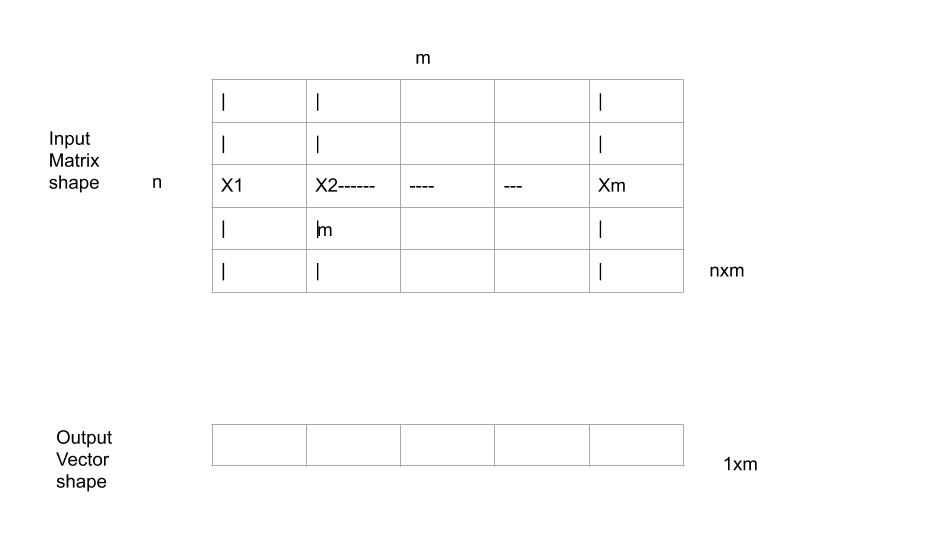

Hope you understand the input and output shape with above diagram

# Sigmoid Activation

There are many types of activation functions available. For e.g ReLU, Sigmoid, tanh, Leaky ReLU. For classification problems we use sigmoid activation function.

![](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

# Initializing weights

Initially we required random weights to make some prediction then we optimize weights using Gradient descent to reduce the overall error in prediction. As we discussed above the shape of weight vectors should be (n, 1). I have used initial values of 0 for both weight and bias.

In [ ]:
def initialize_weights(n):
    w = np.zeros((n, 1))
    b = 0
    return w, b

# Forward Propagation

Let's understand line by line how the forward propagation is working.
**Z = np.dot(w.T, X) + b** --> In this we have taken the dot product of (w Transpose) and X and add the bias term.
we know that the shape of w --> (n, 1) so it's transpose shape will be (1, n)
We know that the shape of X --> (n, m).

so the dot product of w.T and X will give shape of (1, m).

Z = w1x1 + w2x2 + ___ + Wnxn
Z will have a shape of (1, m)


**A = 1/(1 + np.exp(-Z))** --> After calculating Z (linear function) Sigmoid function is used to convert Z into probabilities. If A >= 0.5 we predict our example belong to class 1 else class 0. A has a shape of (1, m)


**cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))** --> This is what you have using using as **binary_crossentropy** loss function. This fucntion calculates the average error over the entire training example at once

In [ ]:
def forward_propagation(X, Y, w, b):
    m = len(X)
    Z = np.dot(w.T, X) + b
    A = 1/(1 + np.exp(-Z))
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    return A, cost

# Backward Propagation

For backprop please refer this link:
[LINK](https://www.youtube.com/watch?v=yXcQ4B-YSjQ)

In [23]:
def backward_propagation(X, Y, A):
    m = len(X)
    dz = A - Y
    dw = (1/m) * np.dot(X, dz.T)
    db = (1/m) * np.sum(dz)
    return dw, db

In [18]:
def optimizer(X, Y, num_iterations = 100, learning_rate = 0.01):
    w, b = initialize_weights(X_train.shape[0])
    costs = []
    for i in range(num_iterations):
        A, cost = forward_propagation(X, Y, w, b)
        dw, db = backward_propagation(X, Y, A)
        w = w - learning_rate * dw        
        b = b - learning_rate * db
        
        costs.append(cost)
    return w, b

In [19]:
w, b = optimizer(X_train, y_train, num_iterations = 100, learning_rate = 0.5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [20]:
def predictions(X, Y, w, b):
    preds = np.zeros((1, X.shape[1]))
    m = len(X)
    Z = np.dot(w.T, X) + b
    A = 1/(1 + np.exp(-Z))
    for i in range(A.shape[1]):
        if A[0][i] >= 0.5:
            preds[0][i] = 1
        else:
            preds[0][i] = 0
    return preds
            
preds = predictions(X_test, y_test, w, b)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [21]:
accuracy = (len(preds[preds == y_test])/len(y_test[0])) * 100
accuracy

99.84146743698597

In [22]:
preds

array([[0., 0., 0., ..., 0., 0., 0.]])

Main motive of this notebook is to show how to implement NN from scratch. Though due to imbalance dataset, this model is predicting all values as 0.